### IMPORT LIBRARY

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plot

### IMPORT DATASET

In [2]:
Train_Folder = './Dataset/train'
Test_Folder = './Dataset/test'

DATASET EXPLORATION

In [3]:
IMG_SIZE = (112, 112)
BATCH_SIZE = 32

TrainData = tf.keras.preprocessing.image_dataset_from_directory(
    directory = Train_Folder,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

TestData = tf.keras.preprocessing.image_dataset_from_directory(
    directory = Test_Folder,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

ClassList = TestData.class_names
ValidData = TestData.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


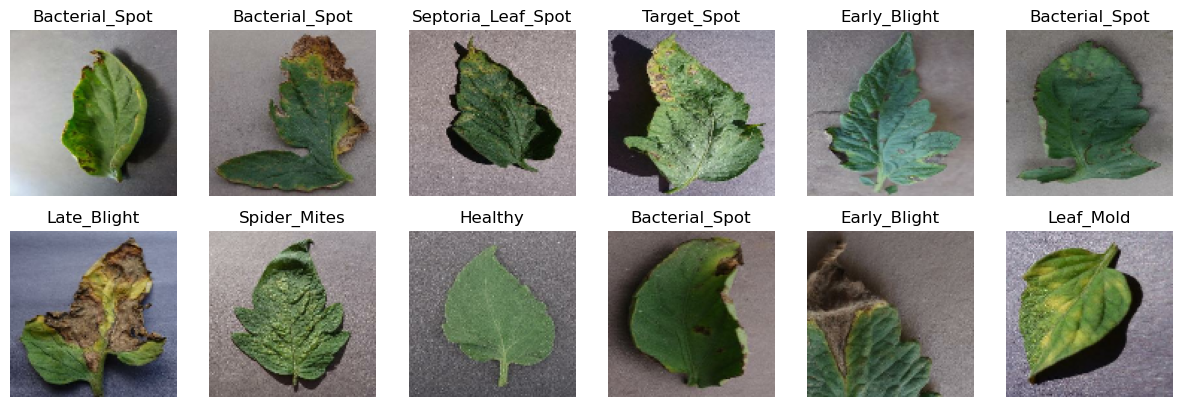

In [4]:
plot.figure(figsize=(15,10))

for ImageBatch, LabelBatch in TrainData.take(1):
    for i in range(0,12):
        plot.subplot(4,6,i+1)
        plot.imshow(ImageBatch[i].numpy().astype("uint32"))
        plot.title(ClassList[np.argmax(LabelBatch[i])])
        plot.axis("off")

---
### DATASET TRANSFORMATION

DATA AUGMENTATION

In [5]:
import tensorflow as tf
from tensorflow.keras import layers


DataAugmentation = tf.keras.Sequential([
  tf.keras.Input(shape=(112, 112, 3)),
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.Rescaling(1./255)
], name = "DataAugmentation")

In [6]:
Checkpoint = "Checkpoint/Checkpoint.weights.h5"
Checkpoint_Callback = tf.keras.callbacks.ModelCheckpoint(
    Checkpoint,
    save_weights_only=True,
    monitor='val_accuracy',
    save_best_only=True
)

---
### MACHINE LEARNING MODEL

MODEL CREATION

In [7]:
Model = tf.keras.Sequential([
    DataAugmentation,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(ClassList), activation='softmax', name='output_layers')
])

In [8]:
Model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

MODEL TRAINING

In [9]:
History = Model.fit(
    TrainData,
    epochs=100, 
    steps_per_epoch=len(TrainData),
    validation_data = TestData,
    validation_steps = len(TestData),
    callbacks = [
        Checkpoint_Callback
    ]
)

Model.summary()

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 294ms/step - accuracy: 0.1624 - loss: 2.2064 - val_accuracy: 0.3440 - val_loss: 1.8519
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 264ms/step - accuracy: 0.3573 - loss: 1.7456 - val_accuracy: 0.4700 - val_loss: 1.5084
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 349ms/step - accuracy: 0.4235 - loss: 1.5245 - val_accuracy: 0.4850 - val_loss: 1.4074
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 402ms/step - accuracy: 0.5072 - loss: 1.3817 - val_accuracy: 0.5980 - val_loss: 1.2438
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 119s 380ms/step - accuracy: 0.5495 - loss: 1.2674 - val_accuracy: 0.5900 - val_loss: 1.2004
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 115s 368ms/step - accuracy: 0.5941 - loss: 1.1932 - val_accuracy: 0.6840 - val_loss: 1.0141
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 366ms/step - accuracy: 0.6303 - loss: 1.0755 - val_accuracy: 0.6280 - val_loss: 1.0456
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 364ms/step - accuracy: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ DataAugmentation (Sequential)   │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, None, None, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, None, None, 16) │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, None, None, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, None, None, 32) │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layers (Dense)           │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,472 (122.94 KB)

 Trainable params: 10,490 (40.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,982 (81.96 KB)

PRE TRAINED MODEL

In [11]:
Pretrained_Model = Model
Pretrained_Model.load_weights(Checkpoint)

Pretrained_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ DataAugmentation (Sequential)   │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, None, None, 32) │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, None, None, 16) │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, None, None, 16) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, None, None, 32) │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layers (Dense)           │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,472 (122.94 KB)

 Trainable params: 10,490 (40.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,982 (81.96 KB)

MODEL EVALUATION

In [19]:
print("For Keras Sequential Model: ")
Model.evaluate(TrainData)
Model.evaluate(TestData)

For Keras Sequential Model: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8810 - loss: 0.3562
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8665 - loss: 0.4391


[0.4148446023464203, 0.8709999918937683]